In [1]:
import pandas as pd
import numpy as np
import jedi
from sklearn.preprocessing import StandardScaler
# from sklearn import metrics
from sklearn.decomposition import PCA
#from sklearn.model_selection import train_test_split
import seaborn as sns

# Visual libraries
import matplotlib.pyplot as plt

#Show all Columns and Rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data set
data_churn = pd.read_csv('churn_clean.csv')

# Amend columns with no names
data_churn = data_churn.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

### Data Prep

In [2]:
# Dropping columns that I think are not relavant to the analysis
data_c = data_churn[['Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Churn']]

In [3]:
data_c.head()

,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year,Churn
0,7.978323,6.795513,172.455519,904.536110,No
1,11.699080,1.156681,242.632554,800.982766,Yes
2,10.752800,15.754144,159.947583,2054.706961,No
3,14.913540,17.087227,119.956840,2164.579412,No
4,8.147417,1.670972,149.948316,271.493436,Yes


In [4]:
# Dropping columns that I think are not relavant to the analysis
data = data_churn[['Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [5]:
data.describe()

,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.001848,34.526188,172.624816,3392.341550
std,2.976019,26.443063,42.943094,2185.294852
min,0.099747,1.000259,79.978860,155.506715
25%,8.018214,7.917694,139.979239,1236.470827
50%,10.018560,35.430507,167.484700,3279.536903
75%,11.969485,61.479795,200.734725,5586.141370
max,21.207230,71.999280,290.160419,7158.981530


In [6]:
# Standarized data for PCA analysis
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_data.head()

,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.679978,-1.048746,-0.003943,-1.138487
1,0.570331,-1.262001,1.630326,-1.185876
2,0.252347,-0.709940,-0.295225,-0.612138
3,1.650506,-0.659524,-1.226521,-0.561857
4,-0.623156,-1.242551,-0.528086,-1.428184


In [7]:
scaled_data.to_csv(r'prepared_dataset.csv', index=False)

### Analysis

In [8]:
# Component extraction
pca= PCA(n_components=data.shape[1], random_state=20)

# PCA fitting
pca.fit(scaled_data)

# PCA transform
customer_pca = pca.transform(scaled_data)

In [9]:
# DataFrame of all PCA
customer_pca_df = pd.DataFrame(customer_pca,columns = ['PC1','PC2','PC3','PC4'])
customer_pca_df.head()

,PC1,PC2,PC3,PC4
0,-1.549525,-0.431810,0.516467,-0.064670
1,-1.659573,1.616766,0.783327,-0.021744
2,-0.944538,0.001214,-0.361592,0.081626
3,-0.903109,0.321420,-2.011196,0.123903
4,-1.912215,-0.754555,0.114259,-0.108945


In [10]:
# Loading and identifying the PCA from the Customer dataframe
loading = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2','PC3','PC4'], index=data.columns)
loading

,PC1,PC2,PC3,PC4
Outage_sec_perweek,0.005898,0.703255,-0.710914,0.000047
Tenure,0.705850,-0.046197,-0.039890,-0.705727
MonthlyCharge,0.040761,0.709435,0.702127,-0.045358
Bandwidth_GB_Year,0.707163,-0.000646,0.005274,0.707031


In [11]:
variance_explained = pca.explained_variance_ratio_*100
print('Variance explained by all PCA = ', sum(variance_explained))

Variance explained by all PCA =  100.00000000000001


### Caputured Variance for each PCA

In [12]:
variance_explained_df = pd.DataFrame(variance_explained.round(2),
                                     columns = ['Captured Variance per PC'], index=data.columns)
variance_explained_df

,Captured Variance per PC
Outage_sec_perweek,49.83
Tenure,25.51
MonthlyCharge,24.50
Bandwidth_GB_Year,0.16


### Cummulative sum by percentage

In [13]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_*100)
pca_cumsum

array([ 49.82927865,  75.34127286,  99.83854226, 100.        ])

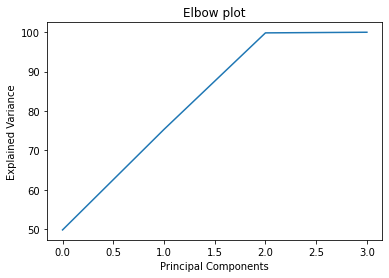

In [14]:
# Scree plot showing the PCs
# Below show the 100 percent of the variance is explained by 2 component 
plt.plot(pca_cumsum)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Elbow plot')
plt.show()

### The plot above explained the 3 Pcs store 100% of variablity

In [15]:
print('Variance explained by First PC: ',pca_cumsum[0])
print('Variance explained by Second PC: ',pca_cumsum[1])
print('Variance explained by Third PC: ',pca_cumsum[2])
print('Variance explained by First 3 PCs: ',pca_cumsum[3])

Variance explained by First PC:  49.82927864725804
Variance explained by Second PC:  75.34127285664778
Variance explained by Third PC:  99.83854226356763
Variance explained by First 3 PCs:  100.00000000000001


### Two-dimensions capture 75% of variability

In [16]:
pca2 = PCA(n_components=2, random_state=20)
pca2.fit(scaled_data)
pca2_transform = pca2.transform(scaled_data)

In [17]:
pc2 = pd.DataFrame(data = pca2_transform, columns=['PC1','PC2'])
pc2.head()

,PC1,PC2
0,-1.549525,-0.431810
1,-1.659573,1.616766
2,-0.944538,0.001214
3,-0.903109,0.321420
4,-1.912215,-0.754555
